In [1]:
import os

print(os.path.abspath(os.curdir))

/home/ww-pc/swardi/drone-GEN_SCL_NAT/notebooks


In [2]:
import os
os.chdir("..")

In [3]:
print(os.path.abspath(os.curdir))

/home/ww-pc/swardi/drone-GEN_SCL_NAT


In [12]:
dataset = pd.read_excel(os.path.join(model_path, 'acos_drone_binary.xlsx')).sort_values(by='text').reset_index()
# print(dataset)

In [6]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import os

model_path = os.path.join('embeddings', 'acos_drone_binary', 'ac-sp_single_1')
drone_sbert = SentenceTransformer(model_path)

drone_embeddings = drone_sbert.encode(dataset['text'].to_list())
# Assuming 'data' is your dataset and 'labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=0)
drone_2d = tsne.fit_transform(drone_embeddings)

tsne_3 = TSNE(n_components=3, random_state=0)
drone_3d = tsne_3.fit_transform(drone_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


num label: 24


/tmp/ipykernel_1948853/1604944475.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_filtered, y_filtered, label=label, c=cmap(i), s=15)


<Figure size 500x250 with 0 Axes>

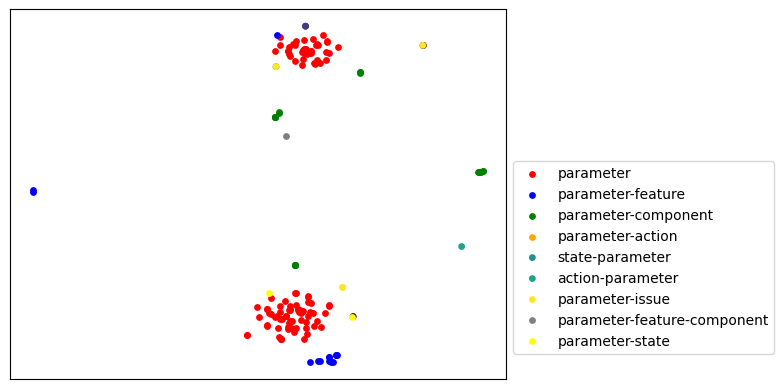

In [26]:
import matplotlib.colors as mcolors

plt.figure(figsize=(5, 2.5))
fig, ax = plt.subplots()
labels = dataset['ac'].to_list()

# unique_labels = ['Normal', 'Low', 'Medium', 'High']
unique_labels = dataset['ac'].unique()
print(f'num label: {len(unique_labels)}')
# colors = ['#4CAF50', '#FFC107', '#FF5722', '#D32F2F']
# cmap = plt.cm.get_cmap('Accent_r')
# Create a list of 24 colors (you can customize these)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 
          'yellow', 'cyan', 'magenta', 'olive', 'teal', 'navy', 'lime', 'gold', 
          'indigo', 'violet', 'maroon', 'turquoise', 'darkorange', 'darkgreen', 
          'darkblue', 'darkred']

# Create a custom colormap
cmap = mcolors.ListedColormap(colors)
counter = 0
unique_labels = [label for label in unique_labels if 'parameter' in label]
for i, label in enumerate(unique_labels):
    # Filter data points for each unique label
    x_filtered = [drone_2d[i][0] for i in range(len(drone_2d)) if labels[i] == label]
    y_filtered = [drone_2d[i][1] for i in range(len(drone_2d)) if labels[i] == label]
    ax.scatter(x_filtered, y_filtered, label=label, c=cmap(i), s=15)
    counter+=1

# Add a legend with only unique labels
ax.set_xticks([])
ax.set_yticks([])
legend = ax.legend(bbox_to_anchor=(1, 0.05), loc='lower left')

# Display the plot
# plt.savefig(os.path.join('visualization', "dataset_viz.pdf"), bbox_inches='tight')
plt.show()
plt.close()

<Figure size 500x250 with 0 Axes>

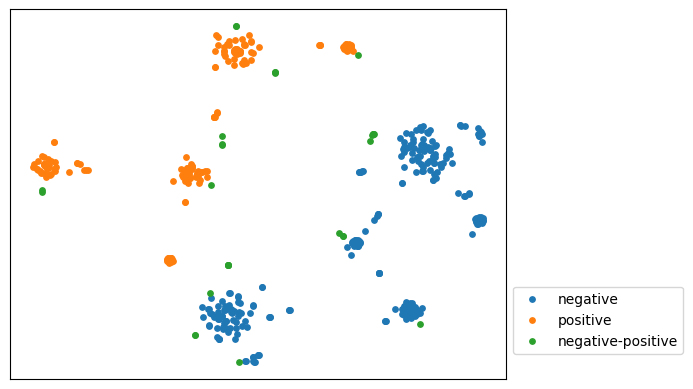

In [8]:
# dataset = pd.read_excel(os.path.join(model_path, 'acos_drone_binary.xlsx')).sort_values(by='text').reset_index()
# print(dataset)
labels = dataset['sp'].to_list()

plt.figure(figsize=(5, 2.5))
fig, ax = plt.subplots()

# unique_labels = ['Normal', 'Low', 'Medium', 'High']
unique_labels = dataset['sp'].unique()
# colors = ['#4CAF50', '#FFC107', '#FF5722', '#D32F2F']

counter = 0
for label in unique_labels:
    # Filter data points for each unique label
    x_filtered = [drone_2d[i][0] for i in range(len(drone_2d)) if labels[i] == label]
    y_filtered = [drone_2d[i][1] for i in range(len(drone_2d)) if labels[i] == label]
    ax.scatter(x_filtered, y_filtered, label=label, s=15)
    counter+=1

# Add a legend with only unique labels
ax.set_xticks([])
ax.set_yticks([])
legend = ax.legend(bbox_to_anchor=(1, 0.05), loc='lower left')

# Display the plot
# plt.savefig(os.path.join('visualization', "dataset_viz.pdf"), bbox_inches='tight')
plt.show()
plt.close()

In [30]:
import plotly.express as px

# Create a DataFrame that includes t-SNE features and the original text labels
drone_2d_df = pd.DataFrame(drone_2d, columns=['t-SNE1', 't-SNE2'])
drone_2d_df['Label'] = labels
drone_2d_df['Text'] = dataset['text']

# Plot with Plotly
fig = px.scatter(drone_2d_df, x='t-SNE1', y='t-SNE2', color="Label", hover_data={'Text': True, 'Label': True, 't-SNE1': False, 't-SNE2': False})
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='t-SNE Visualization with Original Text Labels')
fig.show()

In [31]:
import plotly.express as px

# Create a DataFrame that includes t-SNE features and the original text labels
drone_2d_df = pd.DataFrame(drone_2d, columns=['t-SNE1', 't-SNE2'])
drone_2d_df['Label'] = dataset['sp'].to_list()
drone_2d_df['Text'] = dataset['text']

# Plot with Plotly
fig = px.scatter(drone_2d_df, x='t-SNE1', y='t-SNE2', color="Label", hover_data={'Text': True, 'Label': True, 't-SNE1': False, 't-SNE2': False})
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='t-SNE Visualization with Original Text Labels')
fig.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['component-negative', 'component-negative', 'action-positive', 'feature-negative', 'parameter-negative', 'feature-component-negative', 'state-feature-negative', 'state-negative', 'feature-component-issue-negative', 'feature-negative-positive', 'state-positive', 'parameter-feature-positive', 'parameter-feature-negative-positive', 'component-negative', 'feature-component-negative', 'feature-negative', 'component-negative', 'parameter-negative', 'component-positive', 'parameter-component-positive', 'component-negative', 'feature-negative', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'action-component-negative-positive', 'component-negative', 'action-component-negative', 'component-negative', 'component-negative', 'component-negative', 'parameter-component-positive', 'component-positive', 'component-positive', 'component-negative-positive', 'component-positive', 'component-positive', 'component-positive', 'action-component-negative', 'component-positive', 'parameter-component-positive', 'parameter-component-positive', 'parameter-component-positive', 'parameter-component-positive', 'parameter-component-positive', 'component-positive', 'component-negative', 'component-negative', 'feature-component-positive', 'parameter-component-negative', 'component-negative', 'parameter-negative', 'parameter-negative', 'component-negative', 'component-negative', 'action-feature-negative', 'parameter-positive', 'component-positive', 'parameter-negative', 'state-component-negative', 'component-negative', 'component-positive', 'parameter-positive', 'parameter-negative', 'component-negative', 'action-component-negative', 'parameter-action-positive', 'component-positive', 'parameter-positive', 'parameter-positive', 'parameter-negative', 'parameter-feature-negative', 'parameter-feature-negative', 'parameter-feature-negative', 'parameter-feature-negative', 'action-positive', 'action-positive', 'component-positive', 'component-positive', 'issue-negative', 'parameter-feature-negative', 'parameter-feature-negative-positive', 'feature-component-negative', 'component-negative', 'feature-negative', 'parameter-negative', 'component-negative', 'component-negative', 'feature-negative', 'component-negative-positive', 'component-negative', 'parameter-negative', 'component-negative', 'component-negative', 'parameter-negative', 'parameter-negative', 'parameter-negative', 'parameter-negative', 'parameter-negative', 'component-negative', 'component-negative', 'feature-negative', 'action-negative', 'action-negative', 'feature-negative', 'parameter-negative', 'parameter-component-negative', 'feature-positive', 'parameter-positive', 'feature-component-negative', 'feature-component-negative', 'parameter-component-negative', 'component-negative', 'feature-negative', 'action-negative', 'action-negative', 'parameter-negative', 'state-component-negative', 'state-parameter-negative', 'state-parameter-negative', 'state-negative', 'action-feature-negative', 'parameter-feature-negative', 'parameter-negative', 'issue-negative', 'action-negative', 'action-feature-negative', 'action-negative', 'parameter-negative', 'parameter-negative', 'action-state-negative', 'action-parameter-negative', 'action-component-negative', 'action-negative', 'action-negative', 'action-component-negative-positive', 'action-component-negative-positive', 'component-issue-negative', 'component-positive', 'feature-positive', 'action-negative', 'action-negative', 'component-negative', 'feature-component-negative', 'component-negative', 'component-negative', 'feature-component-negative', 'feature-component-negative', 'feature-component-negative', 'parameter-component-negative', 'component-negative', 'component-negative', 'component-issue-negative', 'parameter-component-negative-positive', 'parameter-component-negative-positive', 'feature-negative', 'parameter-negative', 'component-negative', 'action-component-negative-positive', 'component-negative', 'component-negative', 'component-negative', 'parameter-negative', 'action-component-negative-positive', 'component-negative-positive', 'component-negative-positive', 'component-negative', 'component-negative', 'action-component-negative', 'parameter-component-negative-positive', 'parameter-component-negative-positive', 'parameter-negative', 'parameter-negative', 'parameter-component-negative-positive', 'parameter-component-negative-positive', 'component-negative', 'parameter-negative', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'action-feature-positive', 'parameter-positive', 'feature-positive', 'feature-negative', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-positive', 'feature-negative', 'parameter-feature-negative', 'parameter-feature-negative-positive', 'component-negative', 'component-negative', 'component-negative', 'component-positive', 'state-positive', 'component-negative', 'component-positive', 'state-positive', 'feature-negative', 'state-feature-negative', 'action-positive', 'parameter-negative', 'state-positive', 'state-positive', 'feature-positive', 'parameter-negative', 'parameter-issue-negative', 'parameter-issue-negative-positive', 'parameter-issue-negative-positive', 'issue-negative', 'issue-negative', 'action-negative', 'action-negative', 'action-negative', 'action-negative', 'state-positive', 'parameter-negative', 'parameter-negative', 'state-feature-negative', 'parameter-negative', 'parameter-negative', 'component-positive', 'feature-negative', 'feature-component-negative', 'feature-negative', 'component-negative', 'component-negative', 'component-negative', 'parameter-negative', 'parameter-feature-component-negative-positive', 'action-feature-negative', 'parameter-feature-negative', 'feature-negative', 'parameter-negative', 'component-negative', 'component-positive', 'parameter-negative', 'parameter-negative', 'component-positive', 'feature-negative', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'component-negative', 'parameter-positive', 'issue-negative', 'parameter-negative-positive', 'issue-negative', 'feature-issue-negative', 'issue-negative', 'parameter-negative', 'parameter-negative', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'action-feature-positive', 'parameter-positive', 'parameter-positive', 'parameter-negative', 'action-positive', 'feature-negative', 'parameter-positive', 'feature-component-positive', 'feature-negative', 'component-issue-negative', 'issue-negative', 'component-positive', 'parameter-negative', 'state-negative', 'state-positive', 'action-positive', 'component-positive', 'component-positive', 'component-positive', 'component-positive', 'feature-component-positive', 'feature-component-positive', 'feature-positive', 'feature-component-positive', 'action-positive', 'issue-negative', 'parameter-negative', 'component-negative', 'parameter-feature-negative', 'parameter-state-negative', 'action-feature-negative', 'parameter-positive', 'parameter-component-negative-positive', 'parameter-negative', 'parameter-negative', 'component-negative', 'component-negative', 'parameter-negative', 'issue-negative', 'parameter-issue-negative', 'component-negative', 'parameter-negative', 'parameter-negative', 'parameter-negative', 'parameter-negative-positive', 'parameter-negative', 'parameter-negative', 'parameter-negative', 'parameter-negative', 'parameter-component-negative', 'parameter-state-negative-positive', 'parameter-component-negative-positive', 'component-positive', 'component-negative', 'component-negative', 'component-negative', 'component-negative', 'parameter-negative', 'component-negative', 'component-negative', 'component-positive', 'feature-negative', 'feature-component-negative', 'component-negative', 'parameter-component-negative', 'parameter-positive', 'parameter-positive', 'feature-positive', 'feature-component-positive', 'feature-positive', 'feature-component-positive', 'feature-positive', 'feature-positive', 'action-positive', 'feature-positive', 'state-parameter-positive', 'state-parameter-positive', 'parameter-positive', 'action-positive', 'action-parameter-positive', 'action-parameter-positive', 'action-parameter-positive', 'component-negative', 'component-negative', 'feature-component-positive', 'component-issue-negative-positive', 'feature-component-negative', 'component-negative', 'parameter-positive', 'feature-positive', 'action-component-positive', 'state-positive', 'state-positive', 'parameter-positive', 'parameter-positive', 'parameter-positive', 'feature-positive', 'feature-positive', 'feature-negative', 'parameter-negative', 'action-positive', 'parameter-positive', 'feature-negative', 'parameter-negative', 'action-positive', 'component-negative', 'component-negative', 'feature-negative', 'feature-negative', 'component-positive', 'component-positive', 'parameter-positive', 'parameter-positive', 'action-positive', 'component-positive', 'feature-positive', 'component-negative', 'parameter-negative', 'parameter-negative', 'feature-negative', 'feature-negative', 'state-positive', 'parameter-positive', 'feature-component-negative-positive', 'component-positive', 'component-positive', 'feature-positive', 'issue-negative', 'feature-negative', 'issue-negative', 'issue-negative', 'issue-negative', 'component-issue-negative', 'component-issue-negative', 'parameter-negative', 'issue-negative', 'parameter-negative', 'parameter-negative', 'state-positive', 'state-positive', 'state-positive', 'state-positive', 'parameter-positive', 'action-positive', 'action-positive', 'action-positive', 'state-component-positive', 'component-positive', 'component-positive', 'parameter-positive', 'parameter-feature-negative', 'component-positive', 'parameter-negative', 'state-component-positive', 'feature-positive', 'action-negative', 'action-component-negative', 'issue-negative', 'feature-negative', 'component-negative', 'feature-negative', 'feature-positive', 'issue-negative', 'component-negative', 'parameter-negative', 'action-negative', 'action-negative', 'component-negative', 'parameter-negative', 'component-negative', 'component-negative-positive', 'parameter-negative', 'action-positive', 'action-positive', 'action-positive', 'action-feature-component-negative-positive', 'feature-negative', 'feature-negative', 'feature-negative', 'feature-negative', 'component-negative', 'component-negative', 'component-negative', 'parameter-negative', 'parameter-negative']

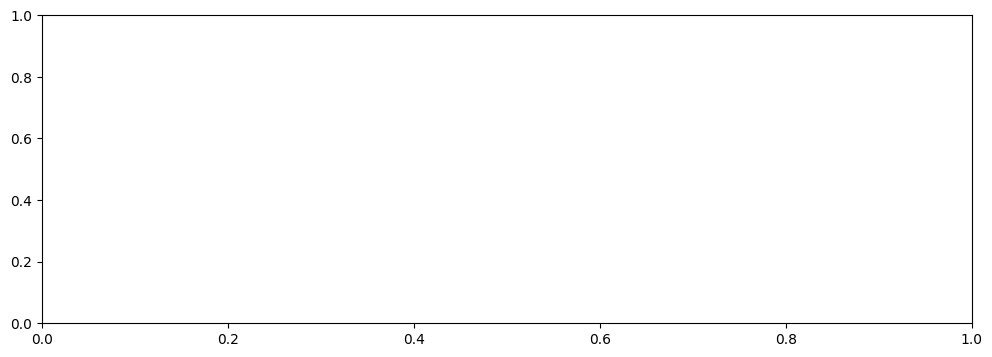

In [6]:
plt.figure(figsize=(12, 4))
scatter = plt.scatter(drone_2d[:, 0], drone_2d[:, 1], c=labels, cmap='RdBu_r', s=15)
# plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('t-SNE visualization of clusters by drone-SBERT')
# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 0.05), loc='lower left')
# plt.savefig(os.path.join('visualizations', 'dataviz_drone-sbert-norm.pdf'), bbox_inches='tight')
# plt.show()
# plt.close()